# 프로젝트 

1. 목적:흉부 x-ray 사진을 통해 폐렴환자 구분하는 모델 생성

2. dataset : 정상/폐렴환자가 섞인 1000명정도의 흉부 x-ray 사진(from keggle)

3. 착안점 : 폐렴환자는 일반인에 비해 흉부 x-ray 사진상에서 흰부분이 많이 보인다는 점에 착안하여 cnn을 통해 검출 가능하다 판단.

4. 진행방향 : 폐렴은 박테리아성 폐렴과 바이러스성 폐렴 두가지로 나뉘는데, 정상/환자 이런식으로 binary 분류도 가능하고 바이러스/박테리아/정상 이런식으로 삼중분류도 가능하다. 일단 이진분류로 접근하고 가능하다면 3중분류까지 해볼계획. x-ray는 흑백으로 보이므로 1채널 이미지일것이라 생각하고 접근했다.

In [1]:
import os,shutil
import keras 
import numpy as np

Using TensorFlow backend.


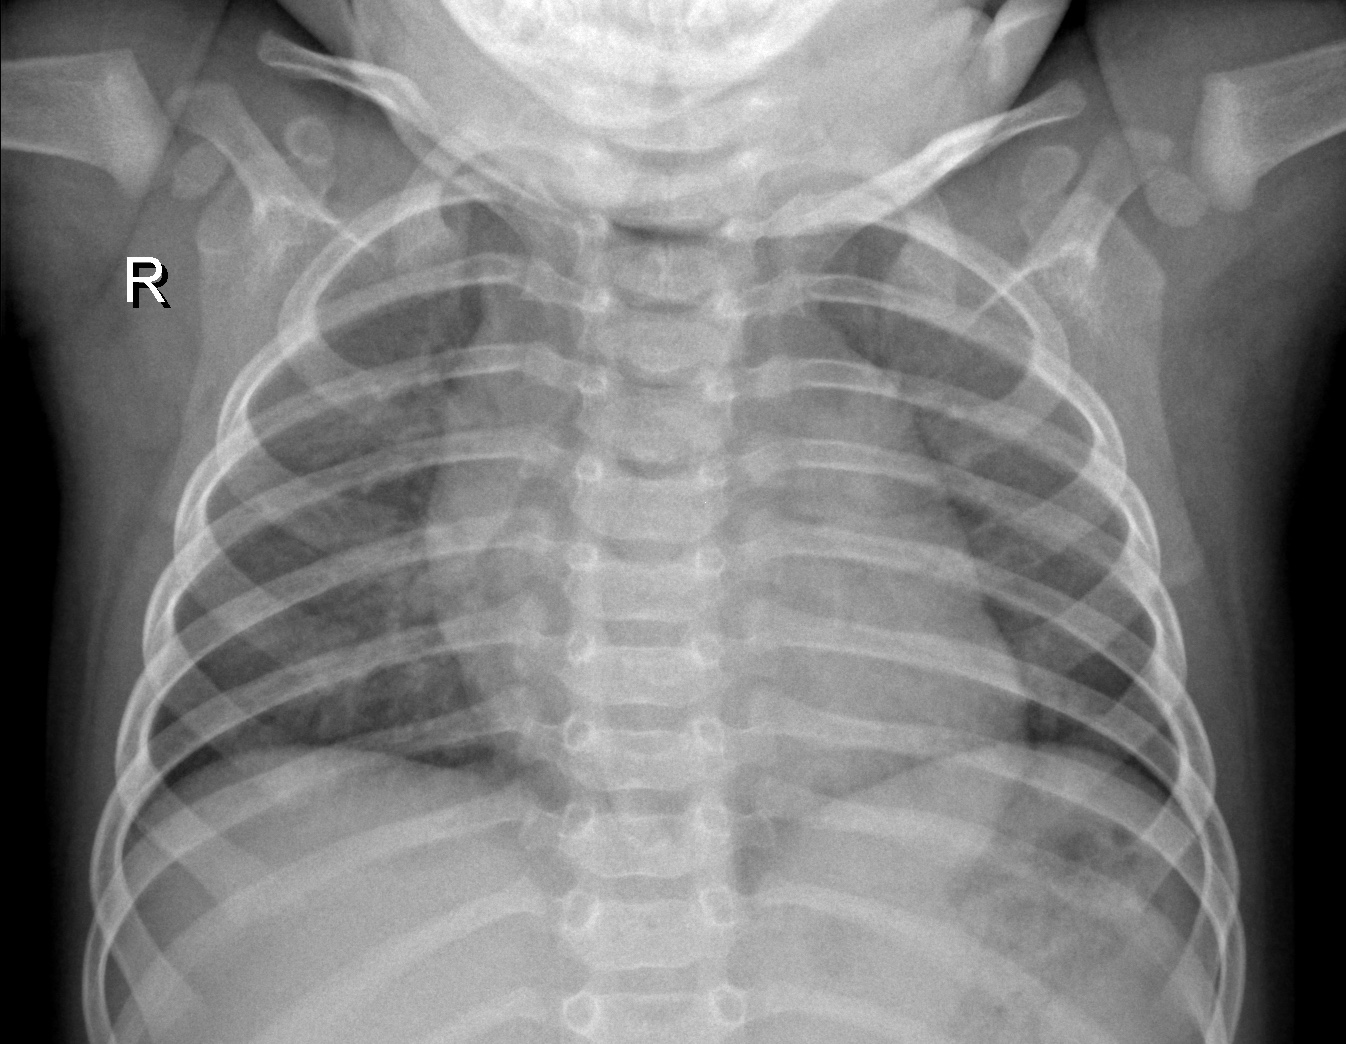

In [2]:
from keras.preprocessing import image

img = image.load_img(r'C:\Users\Affinity\Desktop\IM-0137-0001.jpeg')
img

보기에는 1채널 흑백 이미지로 보인다

In [3]:
img=image.img_to_array(img)

img

array([[[ 0.,  0.,  0.],
        [15., 15., 15.],
        [ 7.,  7.,  7.],
        ...,
        [29., 29., 29.],
        [28., 28., 28.],
        [30., 30., 30.]],

       [[ 0.,  0.,  0.],
        [14., 14., 14.],
        [ 8.,  8.,  8.],
        ...,
        [32., 32., 32.],
        [33., 33., 33.],
        [34., 34., 34.]],

       [[ 1.,  1.,  1.],
        [13., 13., 13.],
        [ 9.,  9.,  9.],
        ...,
        [36., 36., 36.],
        [34., 34., 34.],
        [34., 34., 34.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

* array를 뜯어보니 3채널이다.

### 레이어 쌓기

In [14]:
base_dir='C:\chest_xray'
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')
test_dir=os.path.join(base_dir,'test')

from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))  #3채널이므로 (150,150,3)
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### 이진분류이므로 'binary crossentropy'를 사용해주고, 옵티마이저는 아담, 학습률은 0.0001

In [20]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
             metrics=['acc'])


In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir, target_size=(150,150),
                                                 batch_size=20, class_mode='binary')


validation_generator=test_datagen.flow_from_directory(val_dir,
                                                      target_size=(150,150),
                                                      batch_size=20,
                                                      class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 956 images belonging to 2 classes.


In [22]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [ ]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=100,
                           epochs=30,
                           validation_data=validation_generator,
                           validation_steps=50)

Epoch 1/30
100/100 [==============================] - 40s 403ms/step - loss: 3.9697 - acc: 0.7510 - val_loss: 4.8179 - val_acc: 0.6978
Epoch 2/30
100/100 [==============================] - 40s 401ms/step - loss: 4.0175 - acc: 0.7480 - val_loss: 4.6739 - val_acc: 0.7068
Epoch 3/30
100/100 [==============================] - 42s 419ms/step - loss: 4.3443 - acc: 0.7275 - val_loss: 4.5778 - val_acc: 0.7129
Epoch 4/30
100/100 [==============================] - 39s 394ms/step - loss: 3.6349 - acc: 0.7720 - val_loss: 4.7539 - val_acc: 0.7018
Epoch 5/30
100/100 [==============================] - 39s 389ms/step - loss: 4.0573 - acc: 0.7455 - val_loss: 4.7699 - val_acc: 0.7008
Epoch 6/30
100/100 [==============================] - 39s 394ms/step - loss: 3.9139 - acc: 0.7545 - val_loss: 4.7859 - val_acc: 0.6998
Epoch 7/30
100/100 [==============================] - 40s 400ms/step - loss: 4.1131 - acc: 0.7420 - val_loss: 4.5458 - val_acc: 0.7149
Epoch 8/30
100/100 [==============================] - 4

* 70퍼센트를 넘기지못한다.

In [32]:
model.save('pneumonia.h5')

In [33]:
import matplotlib.pyplot as plt

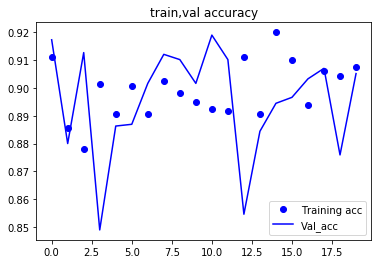

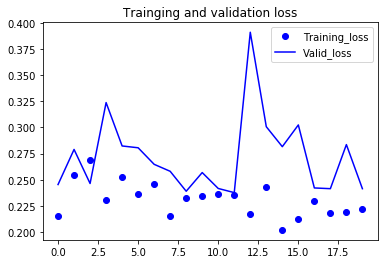

In [63]:
acc=history.history['acc']
val_acc=history.history['val_acc']



loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Val_acc')

plt.title('train,val accuracy')

plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='Valid_loss')

plt.title('Trainging and validation loss')
plt.legend()
plt.show()

* 그래프도 엉망이다. 저렇게 뾰족뾰족 튀는부분을 잡기가  어렵다.

### 데이터 증식을 사용해본다.

이건 미세한 x-ray 사진상의 흰부분의 차이를 찾아내는것 이므로, 

무분별하게 증식하는건  안좋다고 생각했다.

원본에 영향을 안주는 회전,이동,확대 등만 허용하고,

전단은 사용하지않았다

In [35]:
datagen=ImageDataGenerator(rotation_range=90,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          fill_mode='nearest',  # 빈자리를 가장가까운걸로 채우겠다는 옵션
                          zoom_range=0.2,
                          horizontal_flip=True 
                          )



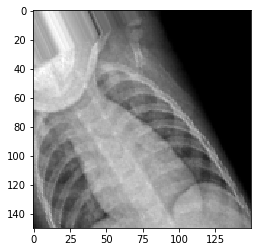

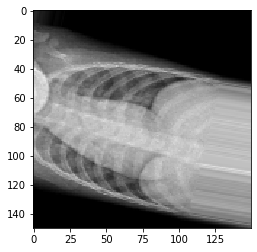

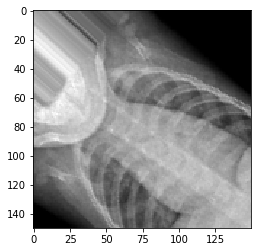

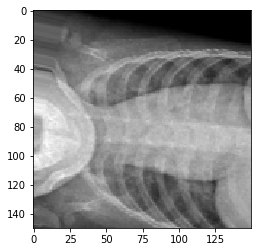

In [40]:
from keras.preprocessing import image


fnames=sorted([os.path.join('C:\\chest_xray\\train\\NORMAL',fname) for fname in os.listdir('C:\\chest_xray\\train\\NORMAL')])

img_path=fnames[10]

img=image.load_img(img_path,target_size=(200,200))

x=image.img_to_array(img)
x_test=image.img_to_array(img)
x=x.reshape((1,)+x.shape)


i=0

for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0 :
        break
        
plt.show()



* 끝부분에 사진이 늘어난것처럼 보이는데
흉부에는 변형이 안갔다

In [13]:
k=image.img_to_array(img)

In [14]:
k

array([[[ 0.,  0.,  0.],
        [15., 15., 15.],
        [ 7.,  7.,  7.],
        ...,
        [29., 29., 29.],
        [28., 28., 28.],
        [30., 30., 30.]],

       [[ 0.,  0.,  0.],
        [14., 14., 14.],
        [ 8.,  8.,  8.],
        ...,
        [32., 32., 32.],
        [33., 33., 33.],
        [34., 34., 34.]],

       [[ 1.,  1.,  1.],
        [13., 13., 13.],
        [ 9.,  9.,  9.],
        ...,
        [36., 36., 36.],
        [34., 34., 34.],
        [34., 34., 34.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]]

In [15]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    
    horizontal_flip=False,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
       
        target_size=(200, 200),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Found 4000 images belonging to 2 classes.
Found 956 images belonging to 2 classes.
Epoch 1/20
50/50 [==============================] - 44s 872ms/step - loss: 0.2150 - acc: 0.9113 - val_loss: 0.2454 - val_acc: 0.9173
Epoch 2/20
50/50 [==============================] - 46s 919ms/step - loss: 0.2543 - acc: 0.8856 - val_loss: 0.2789 - val_acc: 0.8800
Epoch 3/20
50/50 [==============================] - 49s 984ms/step - loss: 0.2686 - acc: 0.8781 - val_loss: 0.2464 - val_acc: 0.9127
Epoch 4/20
50/50 [==============================] - 50s 1s/step - loss: 0.2307 - acc: 0.9012 - val_loss: 0.3237 - val_acc: 0.8490
Epoch 5/20
50/50 [==============================] - 54s 1s/step - loss: 0.2526 - acc: 0.8906 - val_loss: 0.2823 - val_acc: 0.8863
Epoch 6/20
50/50 [==============================] - 55s 1s/step - loss: 0.2362 - acc: 0.9006 - val_loss: 0.2805 - val_acc: 0.8869
Epoch 7/20
50/50 [==============================] - 56s 1s/step - loss: 0.2464 - acc: 0.8906 - val_loss: 0.2647 - val_acc: 0.901

전체적으로 개선된 성능을 보여준다.

In [19]:
model.save('penumia.h5')

In [21]:
import matplotlib.pyplot as plt

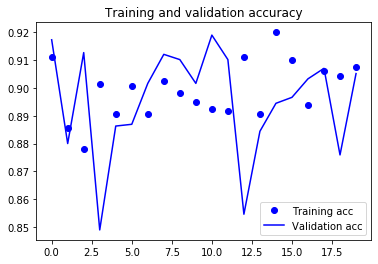

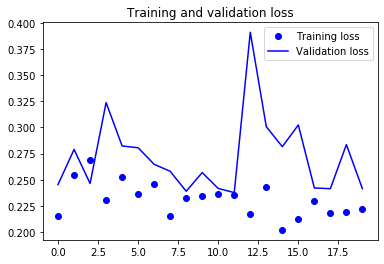

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

성능 자체는 좀 향상된 모습을 보이나 그래프는 아직 엉망이다.

생각한 이유로는 일단 에포크 수가 부족해서 그런것 아닌가 생각한다.

그리고 '지수평균이동' 이라는 기법으로 조금 부드럽게 해줄수있다고한다.
추후에 공부해서 적용해볼 예정

In [45]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  class_mode='binary',
                                                  batch_size=1,
                                                  target_size=(200, 200))
filenames=test_generator.filenames
num=len(filenames)
print(len(filenames))

Found 900 images belonging to 2 classes.


In [64]:
i=0
#라벨만 뽑아보기
for img, label in test_generator:
    if i==10 :
        break
    print(label)
    i+=1

[1.]
[1.]
[1.]
[1.]
[1.]
[0.]
[1.]
[1.]
[1.]
[1.]


In [65]:
i=0
#이미지만 뽑아보기
for img, label in test_generator:
    if i==10 :
        break
    print(img)
    i+=1

[[[[0.25882354 0.25882354 0.25882354]
   [0.26666668 0.26666668 0.26666668]
   [0.27450982 0.27450982 0.27450982]
   ...
   [0.40000004 0.40000004 0.40000004]
   [0.4431373  0.4431373  0.4431373 ]
   [0.48235297 0.48235297 0.48235297]]

  [[0.25490198 0.25490198 0.25490198]
   [0.27450982 0.27450982 0.27450982]
   [0.27450982 0.27450982 0.27450982]
   ...
   [0.4156863  0.4156863  0.4156863 ]
   [0.47058827 0.47058827 0.47058827]
   [0.5019608  0.5019608  0.5019608 ]]

  [[0.2509804  0.2509804  0.2509804 ]
   [0.25882354 0.25882354 0.25882354]
   [0.27450982 0.27450982 0.27450982]
   ...
   [0.3921569  0.3921569  0.3921569 ]
   [0.5176471  0.5176471  0.5176471 ]
   [0.5176471  0.5176471  0.5176471 ]]

  ...

  [[0.10196079 0.10196079 0.10196079]
   [0.17254902 0.17254902 0.17254902]
   [0.19215688 0.19215688 0.19215688]
   ...
   [0.07058824 0.07058824 0.07058824]
   [0.07058824 0.07058824 0.07058824]
   [0.07058824 0.07058824 0.07058824]]

  [[0.00784314 0.00784314 0.00784314]
   [0.0

In [58]:
#테스트데이터 900개에대한 테스트 정확도

i=0
k=0
for img, label in test_generator:
    k+=1
    if k==len(filenames):
        break
    if model.predict(img)>[[0.5]]:   #예상치를 0.5기준으로 이진분류
        p=1          #1은 폐렴
    else :
        p=0         #0은 노멀
        
    if p==label:
        i+=1           
    if k%90==0:   #몇퍼센트 진행중인지 알려줌
        print(k/9,'%')    
print('100.0 %')
print('test accuracy:',i/len(filenames))

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %
test accuracy: 0.8711111111111111


실제 테스트데이터로 테스트해봤다. 87퍼센트의 성능을 보인다.

나쁘진않지만 좋다고 할순없었다.

여러 옵티마이저와 lossfunction, 레이어 조합을 시도해보고 싶었으나

시간관계상 2~3가지 조합밖에 시도해보지 못했다.

조금더 나은 조합을 찾으면 성능을 개선 할 수 있을것같다.

그리고 데이터 증식부분에서 데이터가 끝부분이 하얗게 늘어난부분이 신경쓰인다.

이런경우 어떻게 증식시키는게 좋을지도 생각해볼 부분이다.

그리고 시간때문에 에포크를 많이 못준게 조금 아쉽다.


In [ ]:
img_path=('C:\\chest_xray\\train\\NORMAL\\IM-0115-0001.jpeg')

from keras.preprocessing import image

import numpy as np

img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.0

img_tensor.shape

In [ ]:
layer_outputs=[layer.output for layer in model.layers[:5]]
activation_model=models.Model(input=model.input,output=layer_outputs)
activations=activation_model.predict(img_tensor)

first_activations=activations[0]

In [97]:
activations

[array([[[[1.24308383e-02, 1.38390185e-02, 0.00000000e+00, ...,
           4.52026278e-02, 4.55650426e-02, 2.24310663e-02],
          [8.27142783e-03, 1.34385061e-02, 0.00000000e+00, ...,
           3.75732183e-02, 4.18857075e-02, 1.46727487e-02],
          [3.76840942e-02, 0.00000000e+00, 0.00000000e+00, ...,
           8.24240521e-02, 1.28597096e-01, 0.00000000e+00],
          ...,
          [7.39829019e-02, 1.96023751e-03, 0.00000000e+00, ...,
           2.22428292e-01, 2.49026880e-01, 6.20707944e-02],
          [6.86539486e-02, 0.00000000e+00, 0.00000000e+00, ...,
           2.19872460e-01, 2.50375062e-01, 5.84355183e-02],
          [7.03441575e-02, 0.00000000e+00, 0.00000000e+00, ...,
           2.13417068e-01, 2.44280994e-01, 5.03039882e-02]],
 
         [[1.51820313e-02, 1.31954644e-02, 0.00000000e+00, ...,
           4.27490361e-02, 4.78073545e-02, 1.59400273e-02],
          [8.76395218e-03, 1.34095931e-02, 0.00000000e+00, ...,
           3.86237018e-02, 4.00183015e-02, 1.93569

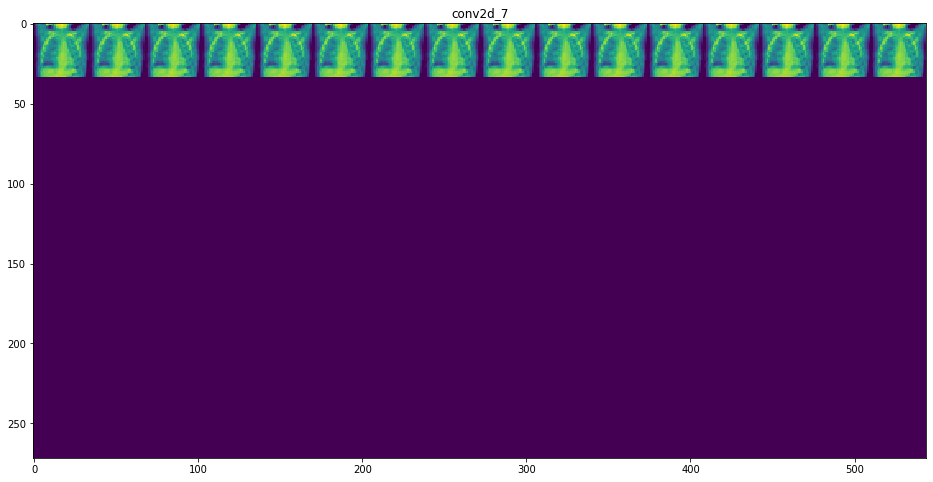

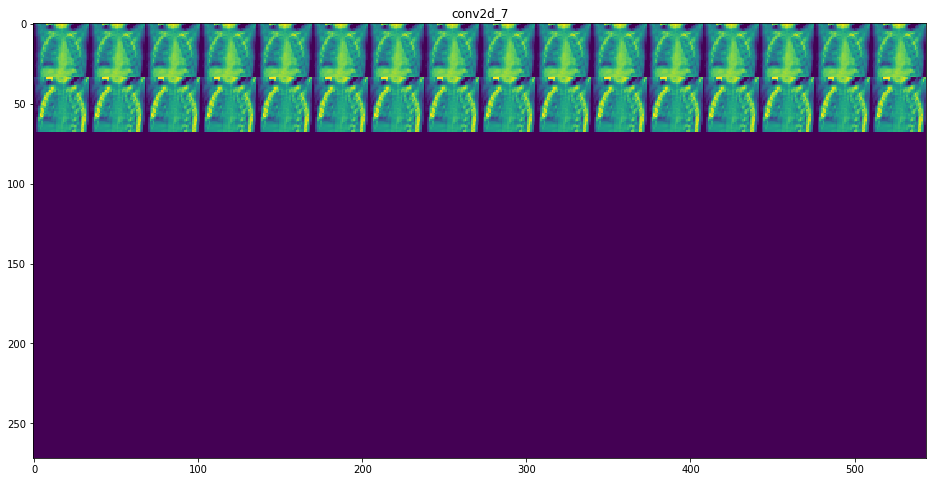

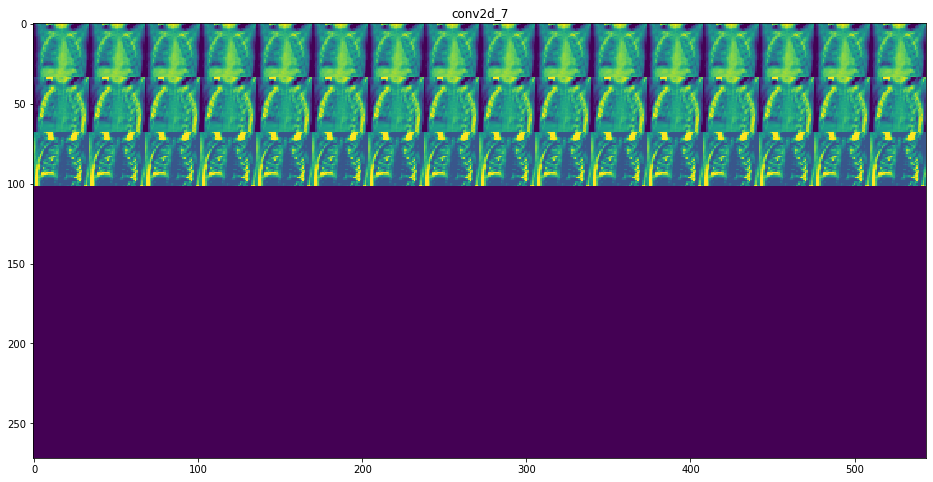

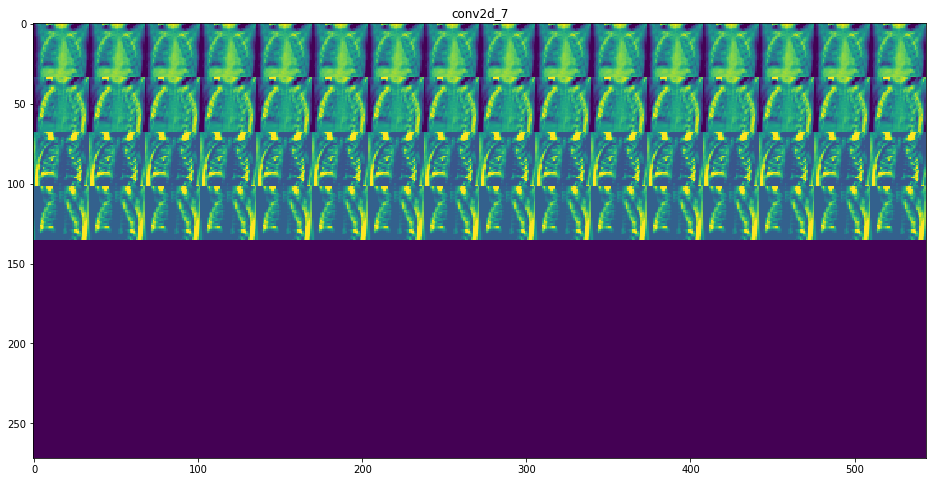

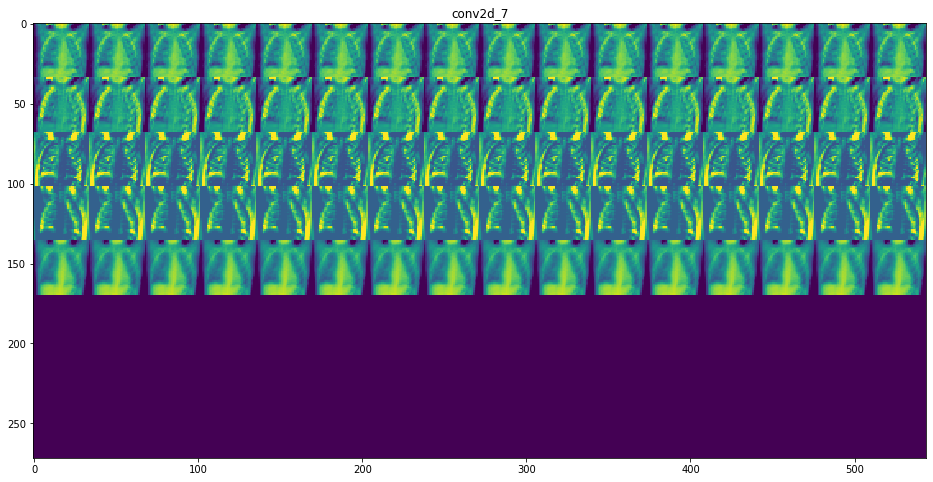

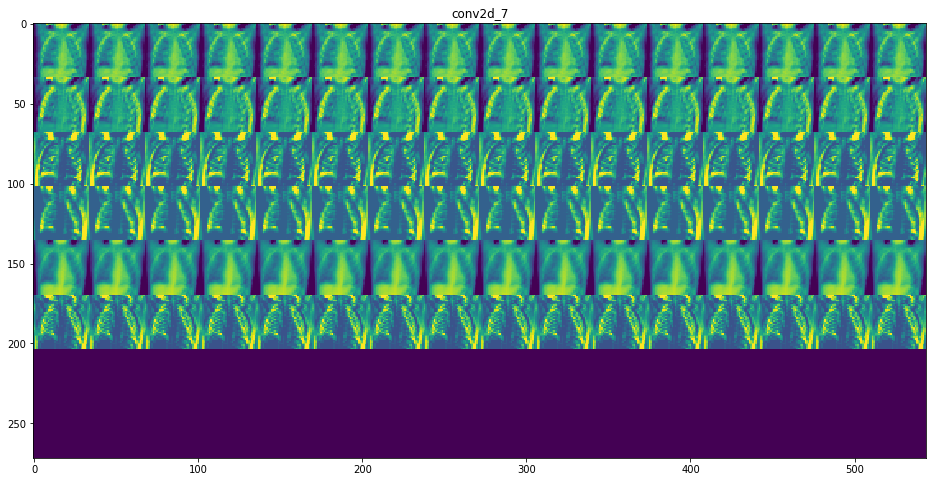

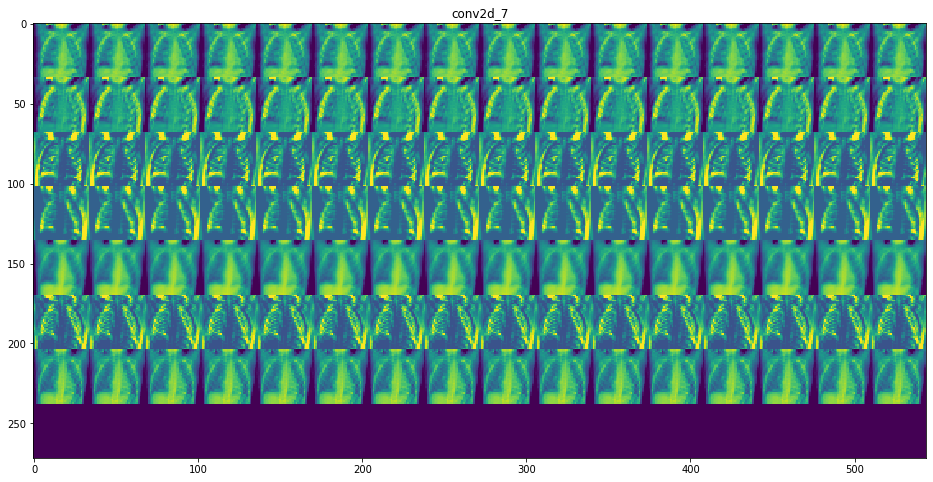

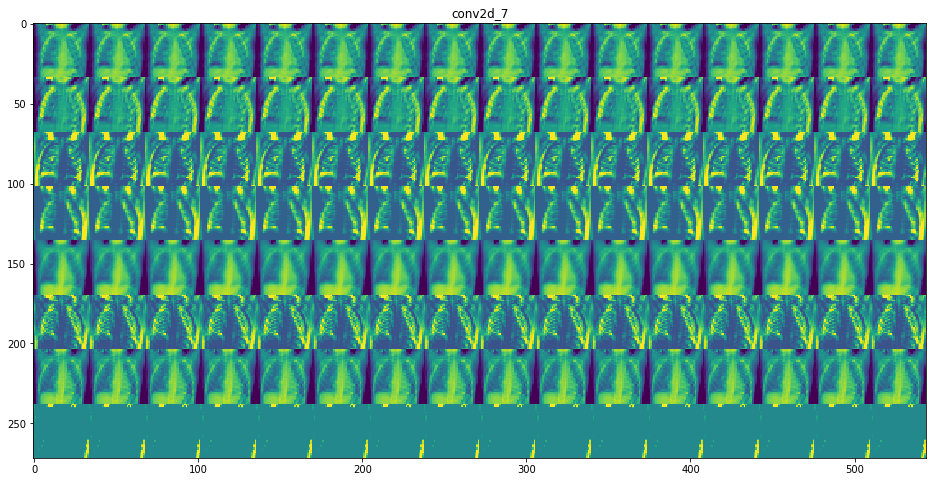

In [104]:
layer_names=[]
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row=16

for layer_name,layer_activation in zip(layer_names,activations):
    n_feature=layer_activation.shape[-1]
    size=layer_activation.shape[1]
    n_cols=n_feature//images_per_row
    display_grid=np.zeros((size*n_cols,images_per_row*size))
    
    
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image=layer_activation[0,:,:,col*images_per_row]
        
        channel_image-=channel_image.mean()
        channel_image/=channel_image.std()
        channel_image*=64
        channel_image+=128
        channel_image=np.clip(channel_image,0,255).astype('uint8')
        display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
    scale=1./size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')

* 층을 내려가면서 이미지를 어떻게 인식하는지 보여준다.
초반엔 알아볼수있지만 뒤로갈수록 알아보기 어렵다